In [1]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Unggah file CSV dari komputer kamu
from google.colab import files
uploaded = files.upload()

Saving harga_rumah_bandung.csv to harga_rumah_bandung.csv


In [5]:
# Baca file yang sudah diupload
df = pd.read_csv('harga_rumah_bandung.csv')


# Tampilkan 5 baris pertama
df.head()

,luas_bangunan,luas_tanah,kamar_tidur,harga
0,70,80,2,650000000
1,160,210,5,1750000000
2,105,125,3,980000000
3,115,140,4,1200000000
4,75,85,2,700000000


In [ ]:
# Cek apakah ada nilai kosong
print("Nilai kosong tiap kolom:\n", df.isnull().sum())

# Hapus baris yang ada nilai kosongnya
df = df.dropna()

# Pilih fitur dan target
X = df[['luas_bangunan', 'luas_tanah', 'kamar_tidur']]
y = df['harga']

Nilai kosong tiap kolom:
 luas_bangunan    0
luas_tanah       0
kamar_tidur      0
harga            0
dtype: int64


In [ ]:
# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bangun model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

# Evaluasi hasil prediksi
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE without the 'squared' argument, taking the square root manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 27124015.51217844
Root Mean Squared Error (RMSE): 31317180.311144862
R² Score: 0.9938595533608579


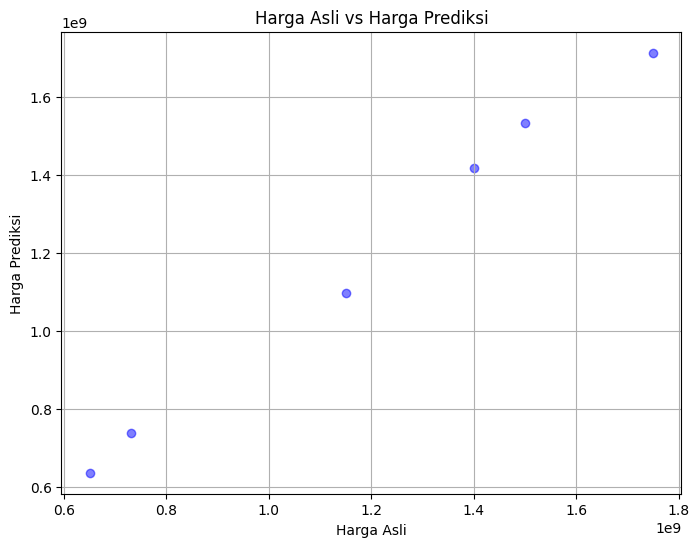

In [ ]:
# Scatter plot antara harga asli dan prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Harga Asli")
plt.ylabel("Harga Prediksi")
plt.title("Harga Asli vs Harga Prediksi")
plt.grid(True)
plt.show()